In [1]:
state = 'ME' 
year = 2020
objective_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of ME has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))
from ME_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 18 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method
from pareto import filter_and_sort_pareto
from metrics import scores

plans_dict = {}
for obj_type in objective_types:
    
    print(f"\n{'#' * 100}")
    print(f"Applying epsilon-constraint method for {state} with compactness objective {obj_type}")
    print(f"{'#' * 100}\n")
    
    plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
    _,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
    print(f"Passing {len(nondominated_warm_starts_plans)} nondominated warm start plans")
    
    (new_plans, obj_bounds, deviations) = epsilon_constraint_method(
                G,                 
                obj_type,          
                contiguity ='lcut',                                             # {'lcut', 'scf', 'shir'} 
                cutoff=None,       
                verbose=True,
                warm_start_mode ='user',                                        # {'None', 'user', 'refinement'}
                warm_starts=nondominated_warm_starts_plans,                                         # if you have user define warm starts else it is None
                starting_deviation=starting_deviation, 
                time_limit=7200, 
                sizes=None,      
                max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
                symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
                state=state,
                year=year
            )
    plans_dict[(state, obj_type)] = list(zip(new_plans, obj_bounds, deviations))
    warm_starts += new_plans


####################################################################################################
Applying epsilon-constraint method for ME with compactness objective cut_edges
####################################################################################################

Passing 4 nondominated warm start plans
Initially, L = 674368 and U = 687991 and k = 2.

****************************************
Trying deviation = 6811.795
****************************************
Using user-provided warm starts.
Selected warm_start = [[0, 3, 6, 12], [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15]]
Objective value: 5
Deviation: 2777.5

****************************************
Running labeling model!
****************************************
L = 674368 and U = 687991 and k = 2
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parame


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 1320 rows, 1128 columns and 4888 nonzeros
Model fingerprint: 0x4945caf0
Model has 3 quadratic constraints
Variable types: 306 continuous, 822 integer (822 binary)
Coefficient statistics:
  Matrix range     [3e-02, 7e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]

User MIP start produced solution with objective 2.35129 (0.02s)
Loaded user MIP start with objective 2.35129

Presolve removed 800 rows and 554 columns
Presolve time: 0.06s
Presolved: 520 rows, 574 columns, 2352 nonzeros
Presolved model has 3 quadratic constraint(s)
Variable types: 9 continuous, 565 integer (565 binary)

Root relaxation: objective 2.149751e-0

Applying warm start!
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 1320 rows, 1128 columns and 4888 nonzeros
Model fingerprint: 0x45f550b2
Model has 3 quadratic constraints
Variable types: 306 continuous, 822 integer (822 binary)
Coefficient statistics:
  Matrix range     [3e-02, 7e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]

User MIP start produced solution with objective 2.41655 (0.01s)
Loaded user MIP start with objective 2.41655

Presolve removed 815 rows and 558 

Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 1320 rows, 1128 columns and 4888 nonzeros
Model fingerprint: 0xcd507cb0
Model has 3 quadratic constraints
Variable types: 306 continuous, 822 integer (822 binary)
Coefficient statistics:
  Matrix range     [3e-02, 7e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 849 rows and 580 columns
Presolve time: 0.04s
Presolved: 471 rows, 548 columns, 2218 nonzeros
Presolved model has 3 quadratic constraint(s)
Variable types: 9 continuous, 539 integer (539 binary)

Root relaxation: objective 6.459416e-01, 181 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Ti

H 3257   382                       0.4334081    0.44709  3.16%  83.0   19s
H 3427   382                       0.4334173    0.44707  3.15%  79.4   19s
* 4097     0              62       0.4334186    0.43346  0.01%  67.9   19s
* 4098     0              61       0.4334199    0.43346  0.01%  67.9   19s

Cutting planes:
  Gomory: 13
  Cover: 27
  Implied bound: 10
  MIR: 49
  StrongCG: 4
  Flow cover: 117
  GUB cover: 1
  Inf proof: 12
  Zero half: 38
  RLT: 92
  Relax-and-lift: 1
  BQP: 3
  Lazy constraints: 3

Explored 4121 nodes (280756 simplex iterations) in 20.31 seconds (6.14 work units)
Thread count was 20 (of 20 available processors)

Solution count 10: 0.43342 0.433419 0.433417 ... 0.399693
No other solutions better than 0.43342

Optimal solution found (tolerance 1.00e-07)
Best objective 4.334198633830e-01, best bound 4.334198633830e-01, gap 0.0000%

User-callback calls 11680, time in user-callback 0.21 sec

****************************************
Optimal solution found! Gurobi st

Variable types: 366 continuous, 882 integer (882 binary)
Coefficient statistics:
  Matrix range     [1e-06, 7e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-07, 2e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 815 rows and 558 columns
Presolve time: 0.07s
Presolved: 688 rows, 690 columns, 2829 nonzeros
Presolved model has 3 quadratic constraint(s)
Variable types: 69 continuous, 621 integer (621 binary)

Root relaxation: objective 9.999990e-01, 267 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0    3          -    1.00000      -     -    0s
     0     0    1.00000    0   94          -    1.00000      -     -    0s
     0     0    0.99468    0  119          -    0.99468      -     -    0s
     0     0    0.97762    0  172          -    0.97762      -     -  

* 8943  1299              42       0.3424196    0.42598  24.4%  64.9   10s
H 8999  1088                       0.3554678    0.42499  19.6%  64.8   10s
H 9467  1039                       0.3567177    0.42114  18.1%  64.4   10s
H 9864  1037                       0.3567190    0.42056  17.9%  64.3   11s
H 9910  1037                       0.3567473    0.42051  17.9%  64.5   11s
H10057  1037                       0.3567553    0.41954  17.6%  64.8   11s
H10066  1037                       0.3567702    0.41954  17.6%  64.8   11s
H10717   962                       0.3567708    0.41484  16.3%  64.6   11s
H10778   962                       0.3567712    0.41484  16.3%  64.6   11s
H15103   459                       0.3567715    0.37278  4.49%  64.8   14s
 15664   168    0.35787   26   92    0.35677    0.37102  3.99%  64.4   15s

Cutting planes:
  Gomory: 42
  Cover: 221
  Implied bound: 5
  MIR: 69
  Flow cover: 156
  Inf proof: 26
  Zero half: 17
  RLT: 88
  Relax-and-lift: 7
  BQP: 1
  Lazy constra


Presolve removed 800 rows and 554 columns
Presolve time: 0.02s
Presolved: 523 rows, 575 columns, 2358 nonzeros
Presolved model has 3 quadratic constraint(s)
Variable types: 10 continuous, 565 integer (565 binary)

Root relaxation: objective 5.861059e-02, 283 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.05861    0   38    4.12629    0.05861  98.6%     -    0s
     0     0    0.39136    0  125    4.12629    0.39136  90.5%     -    0s
     0     0    1.46720    0  129    4.12629    1.46720  64.4%     -    0s
     0     0    1.49081    0  128    4.12629    1.49081  63.9%     -    0s
     0     0    2.22466    0  106    4.12629    2.22466  46.1%     -    0s
     0     0    2.25297    0  182    4.12629    2.25297  45.4%     -    0s
     0     0    2.29141    0  167    4.12629    2.29141  44.5%     -    0s
     0     0    2.47


Root relaxation: objective 5.902197e-01, 176 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.59022    0    -          -    0.59022      -     -    0s
     0     0    1.79846    0   37          -    1.79846      -     -    0s
     0     0    2.58641    0   52          -    2.58641      -     -    0s
     0     0    2.58641    0   74          -    2.58641      -     -    0s
     0     0    2.58676    0  114          -    2.58676      -     -    0s
     0     0    2.58676    0  101          -    2.58676      -     -    0s
     0     0    2.58676    0  107          -    2.58676      -     -    0s
     0     0    2.58676    0   48          -    2.58676      -     -    0s
     0     0    2.58676    0   48          -    2.58676      -     -    0s
     0     2    2.58676    0   48          -    2.58676      -     -    0s
H  684   

No feasible solution was found within the region: [0, 750.5]

####################################################################################################
Pareto Frontier for state ME,  objective cut_edges
####################################################################################################

Pareto front plans: [[[5, 6, 7, 8, 10, 12, 13, 14], [0, 1, 2, 3, 4, 9, 11, 15]], [[1, 4, 5, 6, 7, 8, 13, 15], [0, 2, 3, 9, 10, 11, 12, 14]], [[1, 2, 3, 4, 9, 10, 11, 12, 14, 15], [0, 5, 6, 7, 8, 13]], [[0, 3, 6, 12], [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15]]]
Pareto front upper bounds: [[750.5, 15.0], [1483.5, 14.0], [1882.5, 11.0], [2777.5, 5.0]]
Pareto front lower bounds: [[750.5, 15.0], [1483.5, 14.0], [1882.5, 11.0], [2777.5, 5.0]]


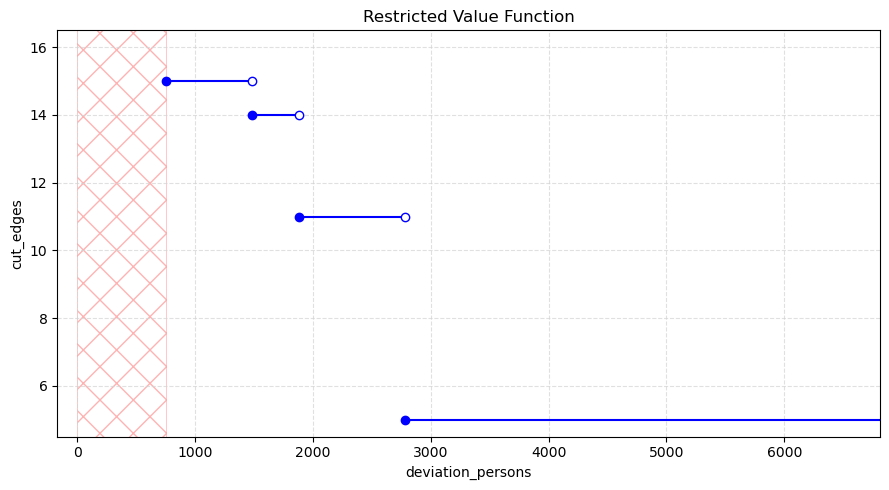

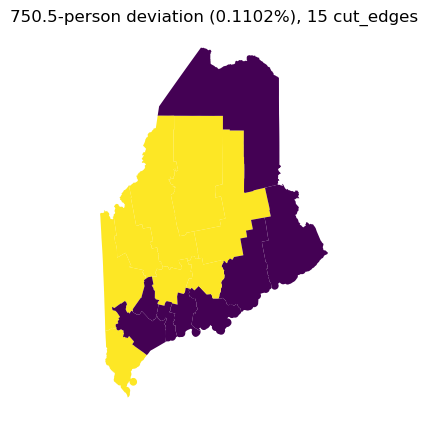

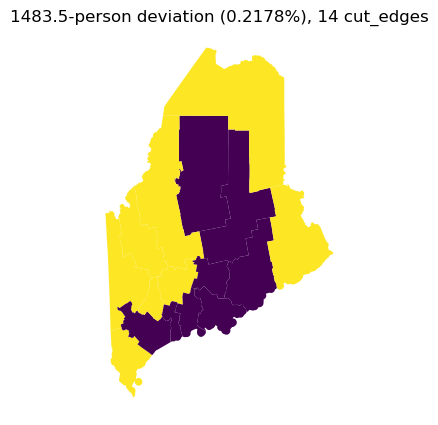

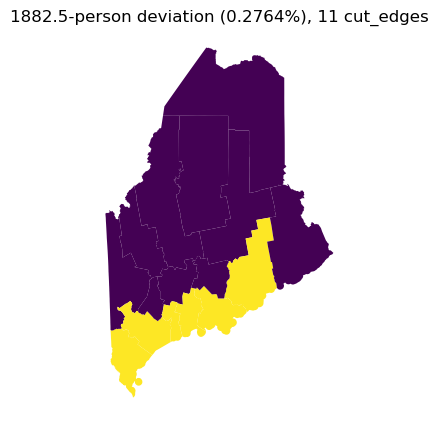

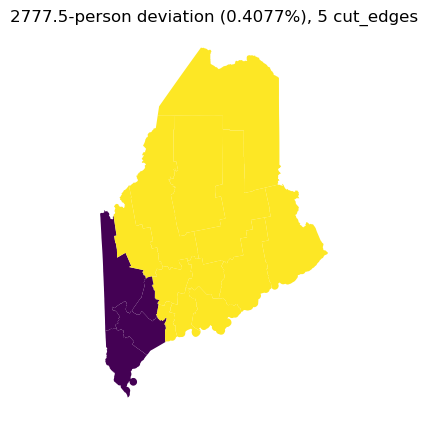

No feasible solution was found within the region: [0, 750.5]

####################################################################################################
Pareto Frontier for state ME,  objective perimeter
####################################################################################################

Pareto front plans: [[[5, 6, 7, 8, 10, 12, 13, 14], [0, 1, 2, 3, 4, 9, 11, 15]], [[1, 2, 3, 4, 9, 10, 11, 12, 14, 15], [0, 5, 6, 7, 8, 13]], [[0, 3, 6, 12], [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15]]]
Pareto front upper bounds: [[750.5, 37.022377125354154], [1882.5, 30.979980713874923], [2777.5, 23.733763883955692]]
Pareto front lower bounds: [[750.5, 37.022377125354154], [1882.5, 30.979980713874923], [2777.5, 23.73376388395569]]


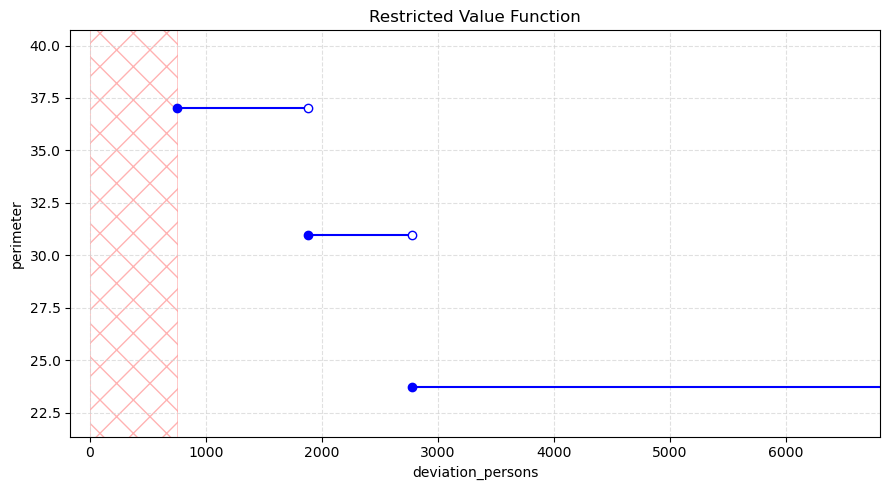

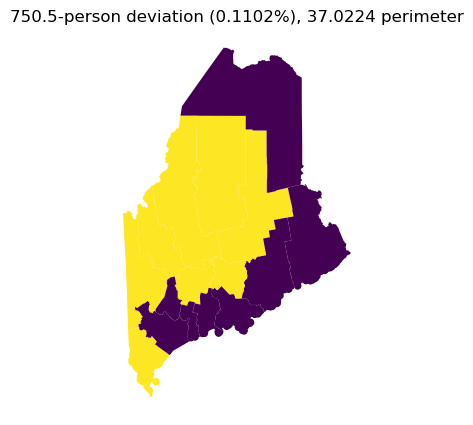

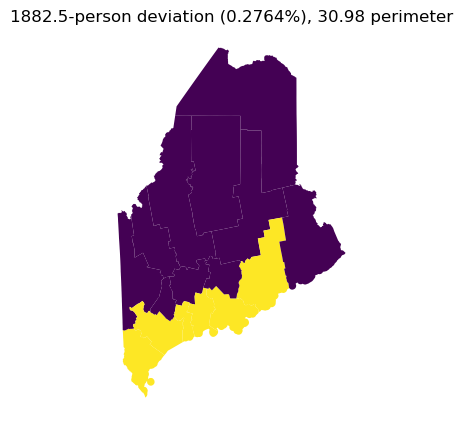

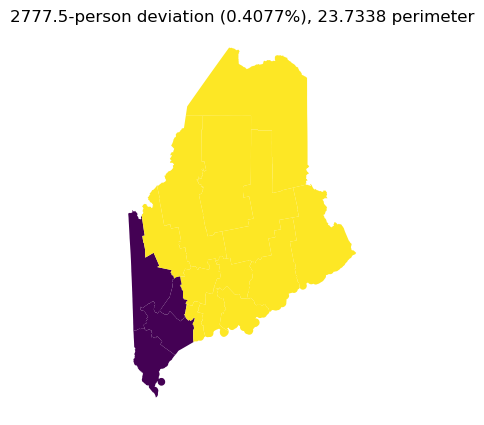

No feasible solution was found within the region: [0, 750.5]

####################################################################################################
Pareto Frontier for state ME,  objective inverse_Polsby_Popper
####################################################################################################

Pareto front plans: [[[5, 6, 7, 8, 10, 12, 13, 14], [0, 1, 2, 3, 4, 9, 11, 15]], [[1, 2, 3, 4, 9, 10, 11, 12, 14, 15], [0, 5, 6, 7, 8, 13]], [[0, 3, 6, 12], [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15]]]
Pareto front upper bounds: [[750.5, 6.126891015162613], [1882.5, 5.047485703140484], [2777.5, 3.094050204160066]]
Pareto front lower bounds: [[750.5, 6.126891015162613], [1882.5, 5.047485703140484], [2777.5, 3.094050204160066]]


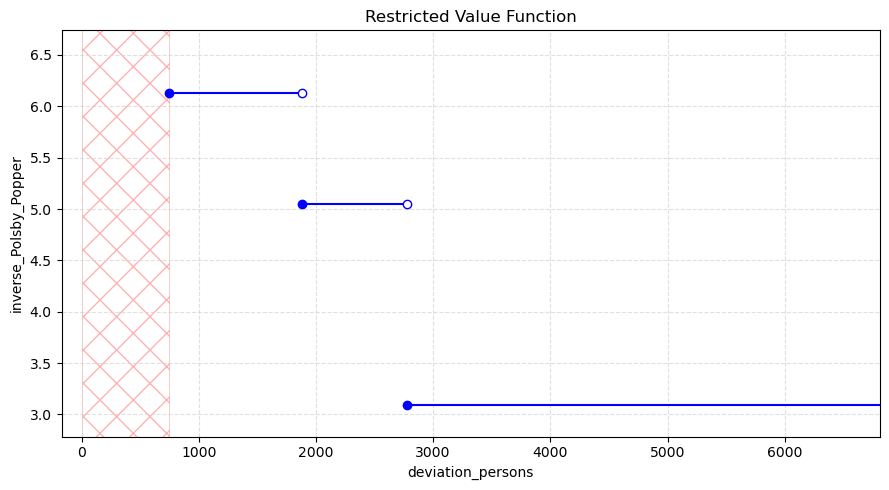

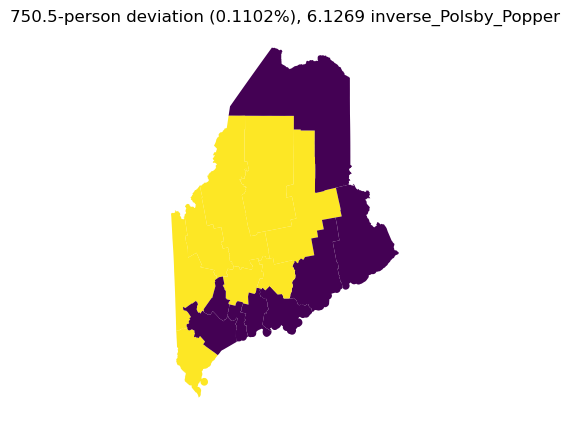

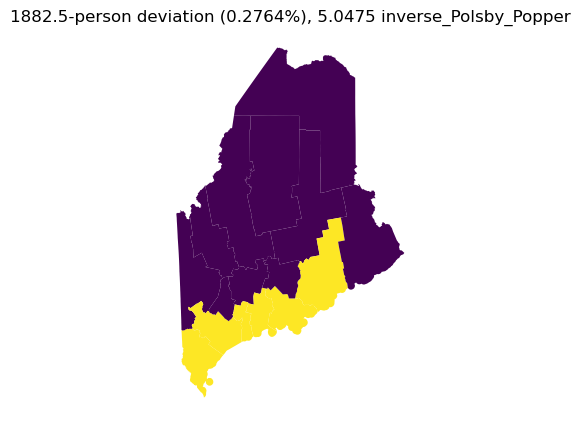

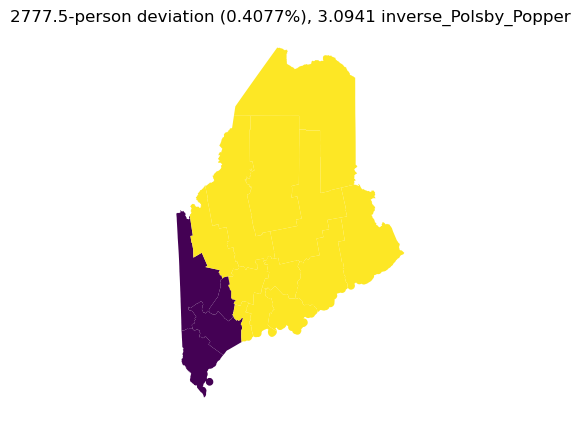

No feasible solution was found within the region: [0, 750.5]

####################################################################################################
Pareto Frontier for state ME,  objective average_Polsby_Popper
####################################################################################################

Pareto front plans: [[[5, 6, 7, 8, 10, 12, 13, 14], [0, 1, 2, 3, 4, 9, 11, 15]], [[1, 2, 3, 4, 9, 10, 11, 12, 14, 15], [0, 5, 6, 7, 8, 13]], [[0, 3, 6, 12], [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15]]]
Pareto front upper bounds: [[750.5, 0.17519521713256836], [1882.5, 0.20765161514282227], [2777.5, 0.3320446014404297]]
Pareto front lower bounds: [[750.5, 0.17519521713256836], [1882.5, 0.20765161514282227], [2777.5, 0.3320446014404297]]


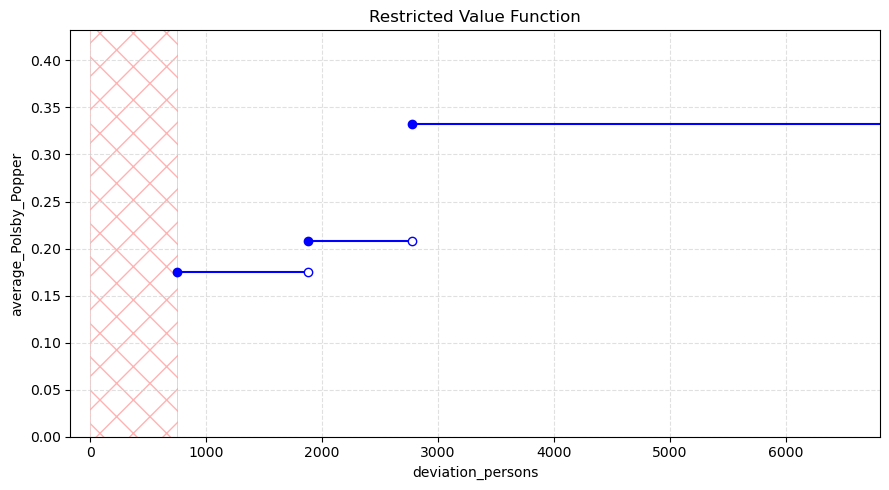

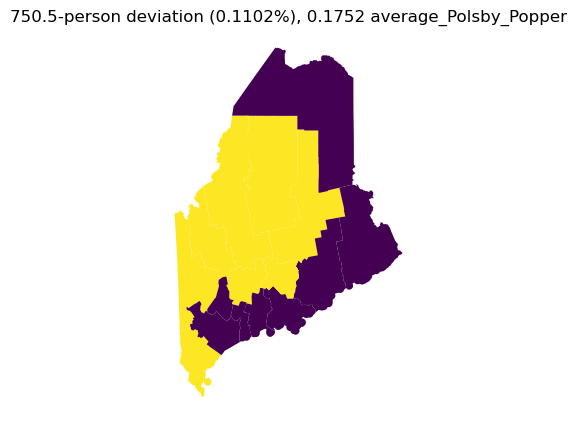

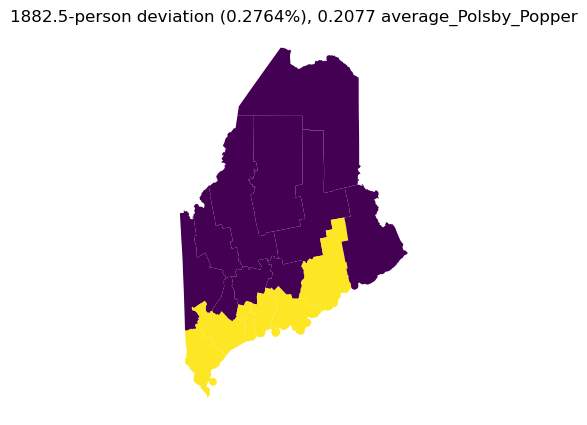

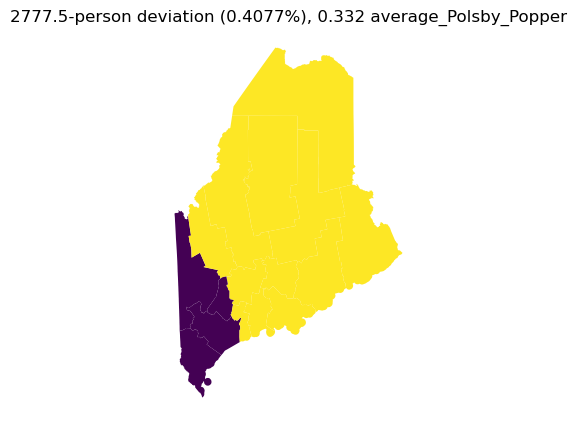

No feasible solution was found within the region: [0, 750.5]

####################################################################################################
Pareto Frontier for state ME,  objective bottleneck_Polsby_Popper
####################################################################################################

Pareto front plans: [[[5, 6, 7, 8, 10, 12, 13, 14], [0, 1, 2, 3, 4, 9, 11, 15]], [[1, 2, 3, 4, 9, 10, 11, 12, 14, 15], [0, 5, 6, 7, 8, 13]], [[0, 3, 6, 12], [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15]]]
Pareto front upper bounds: [[750.5, 0.12938101738023422], [1882.5, 0.16315877486012376], [2777.5, 0.27785457950734666]]
Pareto front lower bounds: [[750.5, 0.12938101738023422], [1882.5, 0.16315877430560263], [2777.5, 0.27785457950734666]]


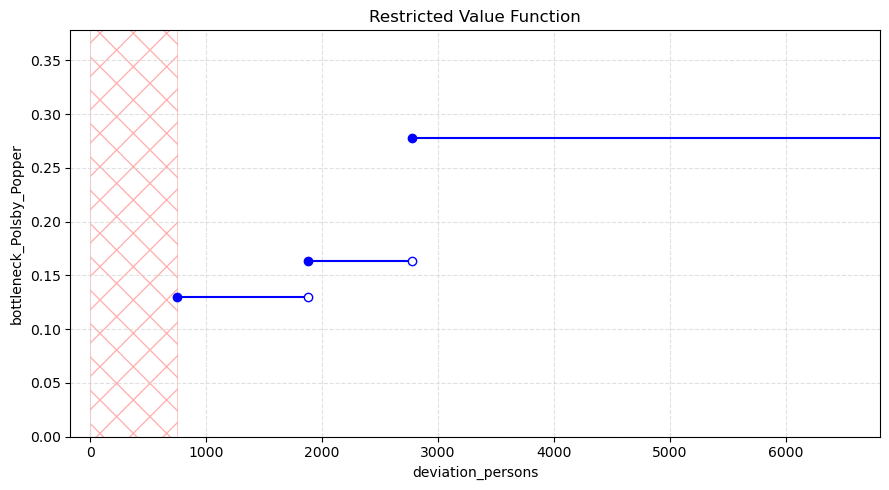

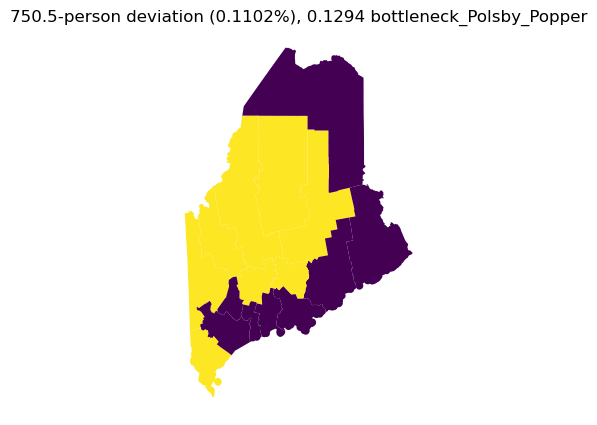

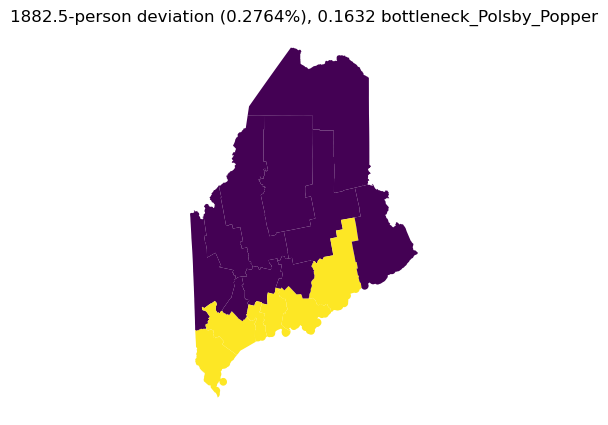

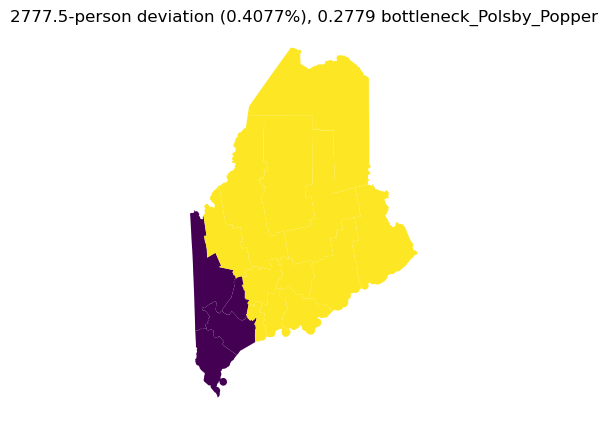

In [7]:
from pareto import plot_pareto_frontiers

epsilon = 1 / (2 * G._k)
for (state, obj_type), result in plans_dict.items():
    
    min_deviation = min(round(r[2], 1) for r in result)
    if min_deviation < epsilon:
        no_solution_region = None
    else:
        no_solution_region = [0, min_deviation]
        print(f"No feasible solution was found within the region: {no_solution_region}")
        
    plot_pareto_frontiers(
                    G,
                    method='epsilon_constraint_method',
                    plans=None,                                   #if method ='epsilon_constraint_method' is None 
                    obj_types=obj_type,                               
                    ideal_population=G._ideal_population,
                    state=state,
                    filepath=filepath,
                    filename2=filename2,
                    no_solution_region=no_solution_region,
                    year=year,
                    result=result                               #if method ='heuristic' is None 
                 )